In [1]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
#import csv (includes MovieData.csv and API data)
combined_df = pd.read_csv("Resources/api_merge_df.csv")
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [3]:
combined_df.dtypes

movie_name                   object
Country                      object
Release Date                 object
IMDB Rating                 float64
Metascore                   float64
TomatoMeter                  object
production_budget             int64
domestic_box_office           int64
international_box_office      int64
rating                       object
genre                        object
Total Box Office              int64
ROI                          object
dtype: object

In [4]:
#convert current ROI column from object type to float
combined_df["ROI"] = combined_df["ROI"].str.rstrip('%').astype('float') / 100.0

In [5]:
#totals of film genres
action_total = len(combined_df.loc[combined_df["genre"]== "Action"])
adventure_total = len(combined_df.loc[combined_df["genre"]== "Adventure"])
comedy_total = len(combined_df.loc[combined_df["genre"]== "Comedy"])
drama_total = len(combined_df.loc[combined_df["genre"]== "Drama"])
horror_total = len(combined_df.loc[combined_df["genre"]== "Horror"])
romantic_total = len(combined_df.loc[combined_df["genre"]== "Romantic Comedy"])
thriller_total = len(combined_df.loc[combined_df["genre"]== "Thriller/Suspense"])

print(action_total, adventure_total, comedy_total, drama_total, horror_total, romantic_total, thriller_total)

294 299 292 442 98 74 228


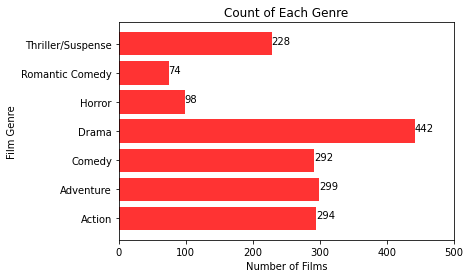

In [43]:
#plotting sum counts of genres
genre_totals = [action_total, adventure_total, comedy_total, drama_total, horror_total, romantic_total, thriller_total]
y_axis = np.arange(len(genre_totals))

plt.barh(y_axis, genre_totals, color='r', alpha=0.8, align="center")
tick_locations = [value for value in y_axis]

plt.yticks(tick_locations, ["Action", "Adventure", "Comedy", "Drama", "Horror", 
                            "Romantic Comedy", "Thriller/Suspense"], rotation=0)

plt.title("Count of Each Genre")
plt.ylabel("Film Genre")
plt.xlabel("Number of Films")

plt.xlim([0, 500])

for index, value in enumerate(genre_totals):
    plt.text(value, index, str(value))

In [16]:
#run for theorized success percentage (ROI >= 277%)
successful_df = combined_df.loc[combined_df["ROI"] >= 2.77]

In [17]:
#totals of successful films per genre
action_success = len(successful_df.loc[successful_df["genre"]== "Action"])
adventure_success = len(successful_df.loc[successful_df["genre"]== "Adventure"])
comedy_success = len(successful_df.loc[successful_df["genre"]== "Comedy"])
drama_success = len(successful_df.loc[successful_df["genre"]== "Drama"])
horror_success = len(successful_df.loc[successful_df["genre"]== "Horror"])
romantic_success = len(successful_df.loc[successful_df["genre"]== "Romantic Comedy"])
thriller_success = len(successful_df.loc[successful_df["genre"]== "Thriller/Suspense"])

print(action_success, adventure_success, comedy_success, drama_success, 
      horror_success, romantic_success, thriller_success)


111 136 112 120 52 30 72


In [25]:
#calculating for percentage of total successful films per genre
pct_action = (action_success/action_total)*100
pct_adventure = (adventure_success/adventure_total)*100
pct_comedy = (comedy_success/comedy_total)*100
pct_drama = (drama_success/drama_total)*100
pct_horror = (horror_success/horror_total)*100
pct_romcom = (romantic_success/romantic_total)*100
pct_thriller = (thriller_success/thriller_total)*100

print(pct_action, pct_adventure, pct_comedy, pct_drama, pct_horror, pct_romcom, pct_thriller)

37.755102040816325 45.48494983277592 38.35616438356164 27.149321266968325 53.06122448979592 40.54054054054054 31.57894736842105


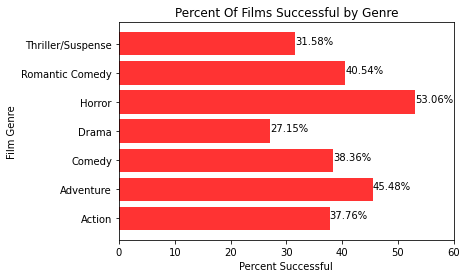

In [44]:
#plotting ROI success by Genre
genre_pcts = [pct_action, pct_adventure, pct_comedy, pct_drama, pct_horror, pct_romcom, pct_thriller]

y_axis = np.arange(len(genre_pcts))

plt.barh(y_axis, genre_pcts, color='r', alpha=0.8, align="center")
tick_locations = [value for value in y_axis]

plt.yticks(tick_locations, ["Action", "Adventure", "Comedy", "Drama", "Horror", 
                            "Romantic Comedy", "Thriller/Suspense"], rotation=0)

plt.title("Percent Of Films Successful by Genre")
plt.ylabel("Film Genre")
plt.xlabel("Percent Successful")

plt.xlim([0, 60])

for index, value in enumerate(genre_pcts):
    plt.text(value, index, "{:.2f}%".format(value))


In [ ]:
#top 50 
top_fifty = successful_df.sort_values("ROI", ascending=False)
top_fifty.head(50)
#or
#top_fifty = successful_df.nlargest(50, "ROI")
#top_fity